# Introdução 

Este é um projeto desenvolvido para a (Maratona Behind the Code 2021), em que, consiste em resolver um problema de classificação de usuários do Banco Bantotal (Bantotal é uma instituição bancaria lider na América Latina, que resolve as operações de missão crítica das Instituições Financeiras de forma simples e precisa). O principal Objetivo desse projeto é criar um modelo de Aprendizado de Máquina capaz de realiza uma análise de risco para predizer se um determinado empréstimo solicitado por um cliente, deve ser aprovado ou não.  

### Autor do Projeto: Rosinaldo Alves da Silva
#### Não é permitido Plágio - Crie seu Próprio Modelo

## Importação dos dados

In [1]:
import pandas as pd
df = pd.read_csv('dados/ACCOUNTS.csv')

In [2]:
df.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [ ]:
# Mostra o numero de linhas não nulas para cada coluna
df.count()

ID                        2477
CHECKING_BALANCE          2467
CREDIT_HISTORY            2462
EXISTING_SAVINGS          2467
EXISTING_CREDITS_COUNT    2463
dtype: int64

### Para a tabela 2

In [3]:
df1 = pd.read_csv('dados/DEMOGRAPHICS.csv')

In [4]:
df1.head()

,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


In [5]:
# Mostra o numero de linhas não nulas para cada coluna
df1.count()

ID                            3936
SEX                           3920
AGE                           3918
JOB_TYPE                      3910
DEPENDENTS                    3915
TELEPHONE                     3915
FOREIGN_WORKER                3909
EMPLOYMENT_DURATION           3923
PROPERTY                      3918
HOUSING                       3912
CURRENT_RESIDENCE_DURATION    3917
dtype: int64

### Para a tabela 3

In [5]:
df2 = pd.read_csv('dados/LOANS.csv')

In [6]:
df2.head()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [8]:
# Mostra o numero de linhas não nulas para cada coluna
df2.count()

ID                     3999
PAYMENT_TERM           3975
INSTALLMENT_PLANS      3978
INSTALLMENT_PERCENT    3974
LOAN_PURPOSE           3979
LOAN_AMOUNT            3981
OTHERS_ON_LOAN         3977
ALLOW                  3999
dtype: int64

## Análise e Tratamento dos dados

### Informações sobre os dados

[
  "ID", # Número de identificação do cliente
  "CHECKING_BALANCE", # Saldo em conta corrente do cliente
  "PAYMENT_TERM", # Número de dias que o cliente tem para pagar o empréstimo
  "CREDIT_HISTORY", # Como está a situação de crédito passada do cliente
  "LOAN_PURPOSE", # Motivação do empréstimo
  "LOAN_AMOUNT", # Valor do empréstimo
  "EXISTING_SAVINGS", # Saldo de conta poupança
  "EMPLOYMENT_DURATION", # Quantos anos o cliente está no último emprego
  "INSTALLMENT_PERCENT", # Em quantas parcelas o empréstimo deve ser pago
  "SEX", # Sexo
  "OTHERS_ON_LOAN", # Se existe um fiador ou outro aplicante para o empréstimo
  "CURRENT_RESIDENCE_DURATION", # Anos em que o cliente está vivendo na última casa
  "PROPERTY", # Se o cliente possui alguma propriedade em nome
  "AGE", # Idade
  "INSTALLMENT_PLANS", # Plano de financiamento, podendo ser do banco, externo, ou nenhum
  "HOUSING", # Tem casa própria ou não
  "EXISTING_CREDITS_COUNT", # Número de empréstimos que o cliente já tem
  "JOB_TYPE", # Tipo de emprego: 0 - desempregado, 1 - Não qualificado, 2 - Autônomo, 3 - Qualificado
  "DEPENDENTS", # Número de pessoas com acesso à conta
  "TELEPHONE", # Se o cliente tem telefone cadastrado ou não
  "FOREIGN_WORKER" # Se o cliente trabalha num país externo ao do banco ou não
]

E como saída um valor binário que representa se o empréstimo deve ser permitido ou não (0 para não, 1 para sim).

> Atenção: os dados disponibilizados neste desafio são fictícios, qualquer correlação com a realidade é mera coincidência.

### Eliminando as colunas indesejadas para cada tabela

In [13]:
# remover a coluna id da tabela DEMOGRAPHICS
novo_df1 = df1.drop('ID', axis = 1)

In [14]:
novo_df1.count()

SEX                           3920
AGE                           3918
JOB_TYPE                      3910
DEPENDENTS                    3915
TELEPHONE                     3915
FOREIGN_WORKER                3909
EMPLOYMENT_DURATION           3923
PROPERTY                      3918
HOUSING                       3912
CURRENT_RESIDENCE_DURATION    3917
dtype: int64

In [15]:
# remover a coluna id da tabela LOANS
novo_df2 = df2.drop('ID', axis = 1)

In [16]:
novo_df2.count()

PAYMENT_TERM           3975
INSTALLMENT_PLANS      3978
INSTALLMENT_PERCENT    3974
LOAN_PURPOSE           3979
LOAN_AMOUNT            3981
OTHERS_ON_LOAN         3977
ALLOW                  3999
dtype: int64

### Juntando as tabelas 

In [17]:
# Juntando ao longo das colunas
uniao_tabelas = pd.concat([df, novo_df1, novo_df2], axis = 1) 

In [18]:
uniao_tabelas.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,291655.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,M,47.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,OWN,3.0,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,657079.0,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0,M,19.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,RENT,2.0,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,256050.0,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0,F,50.0,2.0,1.0,1.0,...,UNKNOWN,OWN,3.0,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,1039151.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,M,35.0,3.0,1.0,0.0,...,REAL_ESTATE,OWN,2.0,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,1002660.0,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0,M,40.0,1.0,1.0,0.0,...,CAR_OTHER,OWN,4.0,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [19]:
uniao_tabelas.count()

ID                            2477
CHECKING_BALANCE              2467
CREDIT_HISTORY                2462
EXISTING_SAVINGS              2467
EXISTING_CREDITS_COUNT        2463
SEX                           3920
AGE                           3918
JOB_TYPE                      3910
DEPENDENTS                    3915
TELEPHONE                     3915
FOREIGN_WORKER                3909
EMPLOYMENT_DURATION           3923
PROPERTY                      3918
HOUSING                       3912
CURRENT_RESIDENCE_DURATION    3917
PAYMENT_TERM                  3975
INSTALLMENT_PLANS             3978
INSTALLMENT_PERCENT           3974
LOAN_PURPOSE                  3979
LOAN_AMOUNT                   3981
OTHERS_ON_LOAN                3977
ALLOW                         3999
dtype: int64

Podemos observar que, a tabela ACCOUNTS contém menos linhas do que as outras, assim vamos verificar e eliminar algumas linhas das outras tabelas. 

### Tratamento dos dados

In [20]:
uniao_tabelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2477 non-null   float64
 1   CHECKING_BALANCE            2467 non-null   object 
 2   CREDIT_HISTORY              2462 non-null   object 
 3   EXISTING_SAVINGS            2467 non-null   object 
 4   EXISTING_CREDITS_COUNT      2463 non-null   float64
 5   SEX                         3920 non-null   object 
 6   AGE                         3918 non-null   float64
 7   JOB_TYPE                    3910 non-null   float64
 8   DEPENDENTS                  3915 non-null   float64
 9   TELEPHONE                   3915 non-null   float64
 10  FOREIGN_WORKER              3909 non-null   float64
 11  EMPLOYMENT_DURATION         3923 non-null   float64
 12  PROPERTY                    3918 non-null   object 
 13  HOUSING                     3912 

Podemos observar que existem algumas linhas com dados faltantes e também existe uma tabela com menos linhas que outras. Assim, posso entender que é necessário remover algumas linhas.

In [21]:
# para remover as linhas com dados faltantes, utilizaremos o dropna() metodo
uniao_tabelas.dropna(inplace = True)

In [22]:
uniao_tabelas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2476
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2230 non-null   float64
 1   CHECKING_BALANCE            2230 non-null   object 
 2   CREDIT_HISTORY              2230 non-null   object 
 3   EXISTING_SAVINGS            2230 non-null   object 
 4   EXISTING_CREDITS_COUNT      2230 non-null   float64
 5   SEX                         2230 non-null   object 
 6   AGE                         2230 non-null   float64
 7   JOB_TYPE                    2230 non-null   float64
 8   DEPENDENTS                  2230 non-null   float64
 9   TELEPHONE                   2230 non-null   float64
 10  FOREIGN_WORKER              2230 non-null   float64
 11  EMPLOYMENT_DURATION         2230 non-null   float64
 12  PROPERTY                    2230 non-null   object 
 13  HOUSING                     2230 

Podemos observar que, existe uma inconsistência nas linhas 2230 à 2476, vou analisar e verificar o que está errado.

In [23]:
uniao_tabelas.count()

ID                            2230
CHECKING_BALANCE              2230
CREDIT_HISTORY                2230
EXISTING_SAVINGS              2230
EXISTING_CREDITS_COUNT        2230
SEX                           2230
AGE                           2230
JOB_TYPE                      2230
DEPENDENTS                    2230
TELEPHONE                     2230
FOREIGN_WORKER                2230
EMPLOYMENT_DURATION           2230
PROPERTY                      2230
HOUSING                       2230
CURRENT_RESIDENCE_DURATION    2230
PAYMENT_TERM                  2230
INSTALLMENT_PLANS             2230
INSTALLMENT_PERCENT           2230
LOAN_PURPOSE                  2230
LOAN_AMOUNT                   2230
OTHERS_ON_LOAN                2230
ALLOW                         2230
dtype: int64

Como todas as colunas tem a mesma quantidade de linhas, estão está ok. 

In [24]:
uniao_tabelas.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,291655.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,M,47.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,OWN,3.0,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,657079.0,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0,M,19.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,RENT,2.0,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,256050.0,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0,F,50.0,2.0,1.0,1.0,...,UNKNOWN,OWN,3.0,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,1039151.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,M,35.0,3.0,1.0,0.0,...,REAL_ESTATE,OWN,2.0,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,1002660.0,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0,M,40.0,1.0,1.0,0.0,...,CAR_OTHER,OWN,4.0,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


### Analisando as colunas 

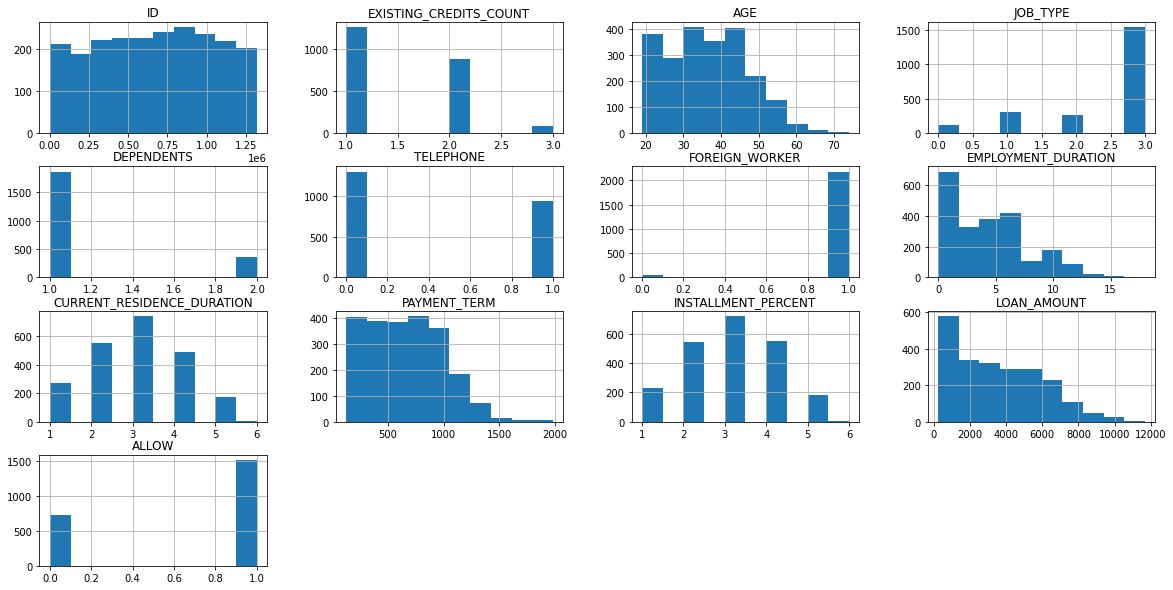

In [27]:
import matplotlib.pyplot as plt

uniao_tabelas.hist(figsize=(20, 10))
plt.show()

Na coluna 'ALLOW' podemos observa que, o total de clientes aprovados foi em torno de 1500 e não aprovados foi de aproximadamente 700 clientes, então há uma propensão maior em um cliente ser aprovado. Podemos observar também que, a maioria dos clientes tem em média 30 à 40 anos. Para a coluna dependentes, podemos observar que há aproximadamente 2000 clientes com 1 dependente e aproximadamente 300 com 2 dependentes.

#### Sendo assim, posso escolher as melhores colunas para treinar o modelo.

In [25]:
sexo = uniao_tabelas['SEX']
contM = 0
contF = 0
m = []
f = []

for i in uniao_tabelas.index:
    if uniao_tabelas.loc[i, 'SEX'] == 'M':
        m.append('M')
        contM += 1
    if uniao_tabelas.loc[i, 'SEX'] == 'F':
        f.append('F')
        contF += 1


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


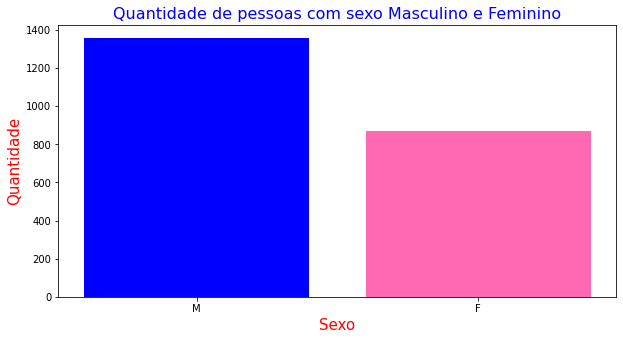

In [28]:
# Quantidade de pessoas com o sexo Masculino e Feminino
plt.figure(figsize=(10, 5))
font1 = {'family': 'Arial', 'color': 'blue', 'fontsize': 16}
font2 = {'family': 'Arial', 'color': 'red', 'fontsize': 15}


plt.title('Quantidade de pessoas com sexo Masculino e Feminino', fontdict = font1)
plt.xlabel('Sexo', fontdict = font2)
plt.ylabel('Quantidade', fontdict = font2)

plt.bar(m, contM, color = 'blue')
plt.bar(f, contF, color = 'hotpink')
plt.show()

Podemos observar que existem aproximadamente 1358 pessoas com sexo Masculino e 872 com sexo Feminino. 

In [29]:
print('Masculino: {}, Feminino: {} '.format(contM, contF))

Masculino: 1358, Feminino: 872 


Sendo assim, a propensão é de maior aprovação para homens, lembrando que isso é só uma estimativa com base nos dados que temos, isso não quer dizer que homens tem mais preferência que as mulheres. Assim,  vamos converter os dados 'M' para 1, e 'F' para 0, já que, o modelo que vai ser utilizado é baseado em dados numéricos.

In [30]:
# transformando os dados 

for i in uniao_tabelas.index:
    if uniao_tabelas.loc[i, 'SEX'] == 'M':
        uniao_tabelas.loc[i, 'SEX'] = 1
    if uniao_tabelas.loc[i, 'SEX'] == 'F':
        uniao_tabelas.loc[i, 'SEX'] = 0

In [31]:
uniao_tabelas['SEX'].head()

0    1
1    1
2    0
3    1
4    1
Name: SEX, dtype: object

In [32]:
# Vamos utilizar essa coluna, pois é importante saber se o cliente tem saldo na conta corrente
 
for i in uniao_tabelas.index:
    if uniao_tabelas.loc[i, 'CHECKING_BALANCE'] == 'NO_CHECKING':
        uniao_tabelas.loc[i, 'CHECKING_BALANCE'] = 0
        

In [33]:
# Vamos utilizar essa coluna, pois é importante saber se o cliente tem saldo na conta poupança

for i in uniao_tabelas.index:
    if uniao_tabelas.loc[i, 'EXISTING_SAVINGS'] == 'UNKNOWN':
        uniao_tabelas.loc[i, 'EXISTING_SAVINGS'] = 0      

In [34]:
uniao_tabelas['CHECKING_BALANCE'].head()

0     -566.53
1    -1673.16
2           0
3    -1471.03
4           0
Name: CHECKING_BALANCE, dtype: object

In [35]:
uniao_tabelas['EXISTING_SAVINGS'].head(25)

0      36.42
1       22.9
2     450.35
3     805.71
4     295.03
6     421.96
7      22.44
8      35.07
9      56.22
10    383.57
12    572.37
13     88.92
14    315.54
15    977.71
16     63.52
17      62.1
18    676.64
19      3.11
20      0.15
21    645.52
22    319.42
23         0
24    303.64
25     227.4
26         0
Name: EXISTING_SAVINGS, dtype: object

In [36]:
uniao_tabelas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2476
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2230 non-null   float64
 1   CHECKING_BALANCE            2230 non-null   object 
 2   CREDIT_HISTORY              2230 non-null   object 
 3   EXISTING_SAVINGS            2230 non-null   object 
 4   EXISTING_CREDITS_COUNT      2230 non-null   float64
 5   SEX                         2230 non-null   object 
 6   AGE                         2230 non-null   float64
 7   JOB_TYPE                    2230 non-null   float64
 8   DEPENDENTS                  2230 non-null   float64
 9   TELEPHONE                   2230 non-null   float64
 10  FOREIGN_WORKER              2230 non-null   float64
 11  EMPLOYMENT_DURATION         2230 non-null   float64
 12  PROPERTY                    2230 non-null   object 
 13  HOUSING                     2230 

Como essas colunas estão como objetos, é necessário converter para dados numéricos

In [37]:
uniao_tabelas['CHECKING_BALANCE'] = uniao_tabelas['CHECKING_BALANCE'].astype(float)
uniao_tabelas['EXISTING_SAVINGS'] = uniao_tabelas['EXISTING_SAVINGS'].astype(float)

In [38]:
uniao_tabelas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2476
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2230 non-null   float64
 1   CHECKING_BALANCE            2230 non-null   float64
 2   CREDIT_HISTORY              2230 non-null   object 
 3   EXISTING_SAVINGS            2230 non-null   float64
 4   EXISTING_CREDITS_COUNT      2230 non-null   float64
 5   SEX                         2230 non-null   object 
 6   AGE                         2230 non-null   float64
 7   JOB_TYPE                    2230 non-null   float64
 8   DEPENDENTS                  2230 non-null   float64
 9   TELEPHONE                   2230 non-null   float64
 10  FOREIGN_WORKER              2230 non-null   float64
 11  EMPLOYMENT_DURATION         2230 non-null   float64
 12  PROPERTY                    2230 non-null   object 
 13  HOUSING                     2230 

In [ ]:
# salvando em uma nova base de dados
#uniao_tabelas.to_csv('dados/novaBaseTransformada.csv', index = False, header = True)

# Agora posso utilizar a nova base de dados para treinar o modelo 

In [7]:
novo_df = pd.read_csv('dados/novaBaseTransformada.csv')

In [8]:
novo_df.head(10)

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,291655.0,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,1,47.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,OWN,3.0,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,657079.0,-1673.16,CREDITS_PAID_TO_DATE,22.90,1.0,1,19.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,RENT,2.0,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,256050.0,0.00,CREDITS_PAID_TO_DATE,450.35,2.0,0,50.0,2.0,1.0,1.0,...,UNKNOWN,OWN,3.0,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,1039151.0,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,1,35.0,3.0,1.0,0.0,...,REAL_ESTATE,OWN,2.0,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,1002660.0,0.00,CREDITS_PAID_TO_DATE,295.03,1.0,1,40.0,1.0,1.0,0.0,...,CAR_OTHER,OWN,4.0,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0
5,1096578.0,0.00,PRIOR_PAYMENTS_DELAYED,421.96,1.0,0,36.0,3.0,2.0,1.0,...,SAVINGS_INSURANCE,OWN,4.0,868.0,NONE,3.0,CAR_USED,4926.0,NONE,0
6,544178.0,-121.70,CREDITS_PAID_TO_DATE,22.44,1.0,1,52.0,3.0,1.0,0.0,...,CAR_OTHER,OWN,4.0,360.0,BANK,1.0,VACATION,1742.0,NONE,1
7,356107.0,-124.51,ALL_CREDITS_PAID_BACK,35.07,1.0,1,48.0,3.0,1.0,1.0,...,SAVINGS_INSURANCE,OWN,4.0,651.0,STORES,2.0,CAR_USED,1730.0,NONE,1
8,72646.0,-1911.77,CREDITS_PAID_TO_DATE,56.22,1.0,1,23.0,2.0,2.0,1.0,...,REAL_ESTATE,OWN,3.0,558.0,NONE,2.0,FURNITURE,1345.0,NONE,0
9,1136574.0,0.00,PRIOR_PAYMENTS_DELAYED,383.57,1.0,0,42.0,2.0,2.0,1.0,...,CAR_OTHER,FREE,4.0,868.0,NONE,4.0,CAR_USED,3942.0,NONE,1


## Criação do Modelo com Base em Arvore de Decisão 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

### Separação dos dados dependentes e dependente 

In [42]:
X  = novo_df[['CHECKING_BALANCE', 'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT', 'SEX', 'AGE', 'JOB_TYPE',
             'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER', 'EMPLOYMENT_DURATION', 'CURRENT_RESIDENCE_DURATION', 
              'PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT']]
y = novo_df['ALLOW']

In [43]:
X.head()

,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT
0,-566.53,36.42,1.0,1,47.0,3.0,1.0,0.0,1.0,14.0,3.0,713.0,3.0,3103.0
1,-1673.16,22.90,1.0,1,19.0,3.0,1.0,0.0,1.0,0.0,2.0,341.0,1.0,716.0
2,0.00,450.35,2.0,0,50.0,2.0,1.0,1.0,1.0,7.0,3.0,868.0,4.0,4333.0
3,-1471.03,805.71,2.0,1,35.0,3.0,1.0,0.0,1.0,0.0,2.0,310.0,2.0,250.0
4,0.00,295.03,1.0,1,40.0,1.0,1.0,0.0,1.0,9.0,4.0,620.0,2.0,2454.0


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: ALLOW, dtype: int64

### Treinando o modelo 

In [45]:
from sklearn.model_selection import train_test_split

In [55]:
for i in range(10):
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20)

    objTreino = DecisionTreeClassifier()
    arvore = objTreino.fit(X_treino, y_treino)

In [52]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1784, 14), (446, 14), (1784,), (446,))

Podemos observar que, ficamos com 1784 linhas para treino e 446 para teste.

### Testando o modelo

In [48]:
from sklearn.metrics import accuracy_score

In [56]:
# prevendo novos valores com base nos dados de treino
predicoes = objTreino.predict(X_teste)
print(predicoes)

[1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 0 1]


In [57]:
# testando com base nos dados de treino
acuracia = accuracy_score(y_teste, predicoes)

print('Acurácia do modelo: ',acuracia)

Acurácia do modelo:  0.6748878923766816


In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np
eqm = mean_squared_error(y_teste, predicoes)

In [59]:
print('Erro quadrático médio: ',np.around(eqm, 2))

Erro quadrático médio:  0.33


### Visualização da arvore de decisão

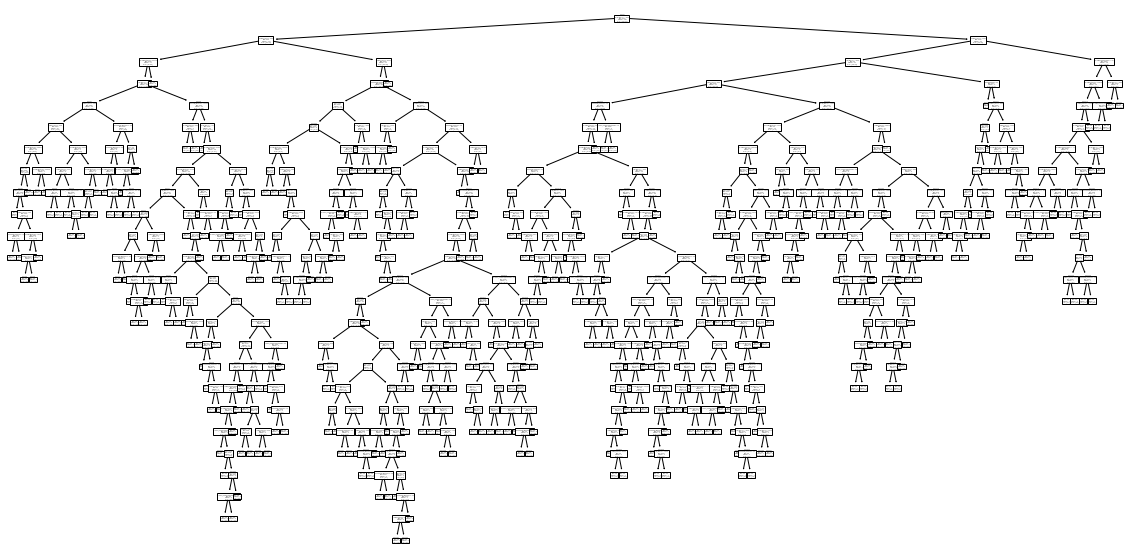

In [61]:
plt.figure(figsize=(20, 10)) #tamanho da figura
tree.plot_tree(arvore, feature_names = X_treino.columns, node_ids = True) # Plotando com o método plot_tree
plt.show()

In [63]:
# Salvando a imagem da arvore
import pydotplus
data = tree.export_graphviz(arvore, out_file = None, feature_names = X_treino.columns)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('arvore.png')

True

# Conclusão
Com isso, podemos observar que é possível prever novos valores a partir de dados anteriores, com o modelo de classificação de arvore de decisão foi possível fazer algumas predições. No entanto, o modelo não é 100% eficaz e nunca podemos está 100% seguros de que as respostas vão ser 100% certas.